https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html

https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html

https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html

https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/

https://alvinntnu.github.io/NTNU_ENC2045_LECTURES/nlp/topic-modeling-naive.html

https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/

https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook

https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook

https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/

In [ ]:

from google.colab import drive
drive.mount("/LDA")


Mounted at /LDA


In [ ]:

#!unzip "/LDA/MyDrive/NLP/Topic Modeling/archive.zip" -d "/LDA/MyDrive/NLP/Topic Modeling/"

In [ ]:

#https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:

df=pd.read_csv("/LDA/MyDrive/NLP/Topic Modeling/Hotel_Seven_Star.csv")
df


,Unnamed: 0,Restaurent,Location,Rating,Review
0,0,Hotel Seven Star Res,Dhaka,3.0,VIP room and washroom were good but some impor...
1,1,Hotel Seven Star Res,Dhaka,4.0,There was no room available. We couldn't stay....
2,2,Hotel Seven Star Res,Dhaka,5.0,Best and fresh food in this hotel.I like this ...
3,3,Hotel Seven Star Res,Dhaka,3.0,The location was too crowded to walk. Well beh...
4,4,Hotel Seven Star Res,Dhaka,4.0,It was clean and i am satisfied
...,...,...,...,...,...
347,347,Hotel Seven Star Res,Dhaka,4.0,NaN
348,348,Hotel Seven Star Res,Dhaka,1.0,NaN
349,349,Hotel Seven Star Res,Dhaka,NaN,NaN
350,350,Hotel Seven Star Res,Dhaka,NaN,NaN


In [ ]:
df=pd.read_csv("/LDA/MyDrive/NLP/Topic Modeling/Hotel_Seven_Star.csv",error_bad_lines=False)
df


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Restaurent,Location,Rating,Review
0,0,Hotel Seven Star Res,Dhaka,3.0,VIP room and washroom were good but some impor...
1,1,Hotel Seven Star Res,Dhaka,4.0,There was no room available. We couldn't stay....
2,2,Hotel Seven Star Res,Dhaka,5.0,Best and fresh food in this hotel.I like this ...
3,3,Hotel Seven Star Res,Dhaka,3.0,The location was too crowded to walk. Well beh...
4,4,Hotel Seven Star Res,Dhaka,4.0,It was clean and i am satisfied
...,...,...,...,...,...
347,347,Hotel Seven Star Res,Dhaka,4.0,NaN
348,348,Hotel Seven Star Res,Dhaka,1.0,NaN
349,349,Hotel Seven Star Res,Dhaka,NaN,NaN
350,350,Hotel Seven Star Res,Dhaka,NaN,NaN


In [ ]:
# a=pd.DataFrame(df,columns=['Review'])
# a

In [ ]:

# a['Review']=a['Review'].fillna(0)
# a


In [ ]:
#df['Unnamed: 0']

In [ ]:
# df.drop(df['Unnamed: 0'],inplace=True,axis=1)
# df

In [ ]:
df.size

1760

In [ ]:
df.shape

(352, 5)

In [ ]:
df.ndim

2

In [ ]:
pd.isnull(df).sum() # or df.isnull().sum() 

Unnamed: 0      0
Restaurent      0
Location        0
Rating          3
Review        224
dtype: int64

In [ ]:
df.isnull().sum() 

Unnamed: 0      0
Restaurent      0
Location        0
Rating          3
Review        224
dtype: int64

In [ ]:
df.isnull().any()

Unnamed: 0    False
Restaurent    False
Location      False
Rating         True
Review         True
dtype: bool

In [ ]:
df=df.head(100)
df

,Unnamed: 0,Restaurent,Location,Rating,Review
0,0,Hotel Seven Star Res,Dhaka,3.0,VIP room and washroom were good but some impor...
1,1,Hotel Seven Star Res,Dhaka,4.0,There was no room available. We couldn't stay....
2,2,Hotel Seven Star Res,Dhaka,5.0,Best and fresh food in this hotel.I like this ...
3,3,Hotel Seven Star Res,Dhaka,3.0,The location was too crowded to walk. Well beh...
4,4,Hotel Seven Star Res,Dhaka,4.0,It was clean and i am satisfied
...,...,...,...,...,...
95,95,Hotel Seven Star Res,Dhaka,5.0,Nothing special
96,96,Hotel Seven Star Res,Dhaka,1.0,disgusted
97,97,Hotel Seven Star Res,Dhaka,4.0,Good Service
98,98,Hotel Seven Star Res,Dhaka,5.0,Home


In [ ]:

document_list=df["Review"].values
document_list

array(['VIP room and washroom were good but some important things were missing. Like there was no balti or mug, no hunger for clothes that can not be expected in hotel like this. And the most annoying thing was a staff who showed us our room. He some what forced us to give him tips the moment we enter the room, can you imagine!',
       "There was no room available. We couldn't stay. Their behaviour was good.",
       'Best and fresh food in this hotel.I like this hotel,because there has refreshment air. Hasn,t polloution',
       'The location was too crowded to walk. Well behaviour. Room was not extraordinary but good enough. Room Rate was in a high range.',
       'It was clean and i am satisfied',
       'Compare to price Hotel seven star is really good. Rooms are neat and clean. Location of hotel is also within good reach.',
       'Ordinary room 500 taka. VIP room 1200-1800 taka. Clean clean beautiful environment. Extremely polite behavior.There is no car parking. And very busy r

In [ ]:
dff=document_list
type(dff)

numpy.ndarray

https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe

In [ ]:
#https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
tokenizer1 = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
tokenizer1.tokenize(s)

['Good',
 'muffins',
 'cost',
 '$3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe

In [ ]:
#https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
# sudu  [a-zA-Z0-9_] match korle print korbe
tokenizer1 = RegexpTokenizer(r'\w+')
tokenizer1.tokenize(s)


['Good',
 'muffins',
 'cost',
 '3',
 '88',
 'in',
 'New',
 'York',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 'Thanks']

https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe

r'\w+|$[0-9]+|\S+'

\w+ matches any word character (equal to [a-zA-Z0-9_])

+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed

$ asserts position at the end of a line

Match a single character present in the list below [0-9]+

+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy) 0-9 a single character in the range between 0 (index 48) and 9 (index 57) (case sensitive)

\S+ matches any non-whitespace character (equal to [^\r\n\t\f\v ]) + Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)

' matches the character ' literally (case sensitive)

Global pattern flags g modifier: global. All matches (don't return after first match) m modifier: multi line. Causes ^ and $ to match the begin/end of each line (not only begin/end of string)

\w+ matches any word character (equal to [a-zA-Z0-9_])

and Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed

In [ ]:
df['Review']

0     VIP room and washroom were good but some impor...
1     There was no room available. We couldn't stay....
2     Best and fresh food in this hotel.I like this ...
3     The location was too crowded to walk. Well beh...
4                       It was clean and i am satisfied
                            ...                        
95                                      Nothing special
96                                            disgusted
97                                         Good Service
98                                                 Home
99                                               Normal
Name: Review, Length: 100, dtype: object

In [ ]:

# Initialize regex tokenizer
#RegexpTokenizer() method to extract stream of tokens with the help of regular expressions

#https://stackoverflow.com/questions/56821101/can-someone-explain-me-what-is-the-meaning-of-all-the-code-inside-these-parenthe
## sudu  [a-zA-Z0-9_] match korle print korbe
tokenizer = RegexpTokenizer(r'\w+')
str_review=str(df['Review'].values)
tokenizer.tokenize(str_review)



['VIP',
 'room',
 'and',
 'washroom',
 'were',
 'good',
 'but',
 'some',
 'important',
 'things',
 'were',
 'missing',
 'Like',
 'there',
 'was',
 'no',
 'balti',
 'or',
 'mug',
 'no',
 'hunger',
 'for',
 'clothes',
 'that',
 'can',
 'not',
 'be',
 'expected',
 'in',
 'hotel',
 'like',
 'this',
 'And',
 'the',
 'most',
 'annoying',
 'thing',
 'was',
 'a',
 'staff',
 'who',
 'showed',
 'us',
 'our',
 'room',
 'He',
 'some',
 'what',
 'forced',
 'us',
 'to',
 'give',
 'him',
 'tips',
 'the',
 'moment',
 'we',
 'enter',
 'the',
 'room',
 'can',
 'you',
 'imagine',
 'There',
 'was',
 'no',
 'room',
 'available',
 'We',
 'couldn',
 't',
 'stay',
 'Their',
 'behaviour',
 'was',
 'good',
 'Best',
 'and',
 'fresh',
 'food',
 'in',
 'this',
 'hotel',
 'I',
 'like',
 'this',
 'hotel',
 'because',
 'there',
 'has',
 'refreshment',
 'air',
 'Hasn',
 't',
 'polloution',
 'The',
 'location',
 'was',
 'too',
 'crowded',
 'to',
 'walk',
 'Well',
 'behaviour',
 'Room',
 'was',
 'not',
 'extraordinary',

In [ ]:

# Vectorize document using TF-IDF
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        #ngram_rangetuple (min_n, max_n), default=(1, 1)
                        #The lower and upper boundary of the range of n-values 
                        #for different n-grams to be extracted
                        ngram_range = (1,1),
                        # sudu  [a-zA-Z0-9_] match korle print korbe
                        # tokenizer = RegexpTokenizer(r'\w+')
                        tokenizer = tokenizer.tokenize)

tfidf


TfidfVectorizer(stop_words='english',
                tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [ ]:

# Fit and Transform the documents
train_data = tfidf.fit_transform(document_list) 
train_data


<100x162 sparse matrix of type '<class 'numpy.float64'>'
	with 316 stored elements in Compressed Sparse Row format>

In [ ]:

# Define the number of topics or components
num_components=10




In [ ]:
# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)
model


LatentDirichletAllocation()

In [ ]:

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)
lda_matrix


array([[0.01790315, 0.01790469, 0.82545237, 0.01792688, 0.03129902,
        0.01789998, 0.01789915, 0.01791914, 0.01789785, 0.01789777],
       [0.02799381, 0.02799258, 0.02802963, 0.0279927 , 0.74799279,
        0.02801876, 0.02799259, 0.02799267, 0.02799829, 0.02799619],
       [0.78204159, 0.02421822, 0.02421817, 0.02421473, 0.02421609,
        0.02421473, 0.02422895, 0.02421806, 0.02421473, 0.02421473],
       [0.02454296, 0.02454445, 0.02455276, 0.02454748, 0.02457227,
        0.77906255, 0.02454375, 0.02454627, 0.02454453, 0.02454296],
       [0.04152321, 0.0415049 , 0.62643724, 0.0415049 , 0.0415049 ,
        0.0415049 , 0.04150527, 0.0415049 , 0.0415049 , 0.0415049 ],
       [0.02255319, 0.02255148, 0.02256764, 0.02257128, 0.02271856,
        0.02255511, 0.79681383, 0.02256611, 0.0225514 , 0.0225514 ],
       [0.02004593, 0.02004593, 0.81957719, 0.02004882, 0.02004944,
        0.02004886, 0.02004596, 0.02004593, 0.02004601, 0.02004593],
       [0.03170248, 0.03170248, 0.0317027

In [ ]:

# Get Components 
lda_components=model.components_
lda_components


array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.63937133],
       [0.97605897, 0.31592286, 0.31592286, ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.47306834, 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ]])

In [ ]:

# Print the topics with their terms
terms = tfidf.get_feature_names()
terms

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 '1200',
 '1800',
 '194',
 '500',
 '7',
 '8801552222333',
 'abasik',
 'accomodation',
 'air',
 'allah',
 'amazing',
 'angelsofdhaka',
 'annoying',
 'ar',
 'attractive',
 'available',
 'average',
 'bad',
 'balti',
 'beautiful',
 'behavior',
 'behaviour',
 'best',
 'better',
 'book',
 'bro',
 'budget',
 'busy',
 'car',
 'cheap',
 'city',
 'clean',
 'clothes',
 'cockroaches',
 'com',
 'comfortable',
 'compare',
 'couldn',
 'crowded',
 'dependable',
 'dhaka',
 'dirty',
 'disgusted',
 'disgusting',
 'eating',
 'engineering',
 'enter',
 'environment',
 'escort',
 'expected',
 'extraordinary',
 'extremely',
 'facilities',
 'fall',
 'far',
 'fateh',
 'food',
 'forced',
 'foreigner',
 'fresh',
 'friend',
 'giving',
 'gold',
 'good',
 'great',
 'hasn',
 'hated',
 'high',
 'holet',
 'home',
 'hotel',
 'hunger',
 'imagine',
 'important',
 'inside',
 'kind',
 'like',
 'live',
 'local',
 'location',
 'login',
 'looking',
 'low',
 'machine',
 'missing',
 'moment',
 'money',
 'mug',
 'near',
 'n

https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1

In [ ]:
#https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1
mylist = [[7, 8], [1, 2, 3], [2, 5, 6]]
# list(map(lambda x: x[1], mylist)) returns [8, 2 ,5]


# always right side theke print korbe....  but index dia dile seita agee print korbe
mylistSort = sorted(mylist, key = lambda x: x[1])
mylistSort
# will sort the nested list based on the result of the lambda function 

[[1, 2, 3], [2, 5, 6], [7, 8]]

https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1

In [ ]:
#https://stackoverflow.com/questions/16310015/what-does-this-mean-key-lambda-x-x1
cars = [('citroen', 'xsara', 1100), ('lincoln', 'navigator', 2000), ('bmw', 'x5', 1700)]

# always right side theke print korbe....  but index dia dile seita agee print korbe
print(sorted(cars, key=lambda car: car[0]))
print(sorted(cars, key=lambda car: car[1]))
print(sorted(cars, key=lambda car: car[2]))
print(f"-"*90)
print(sorted(cars, key=lambda car: car[-1]))
print(sorted(cars, key=lambda car: car[-2]))
print(sorted(cars, key=lambda car: car[2]))

[('bmw', 'x5', 1700), ('citroen', 'xsara', 1100), ('lincoln', 'navigator', 2000)]
[('lincoln', 'navigator', 2000), ('bmw', 'x5', 1700), ('citroen', 'xsara', 1100)]
[('citroen', 'xsara', 1100), ('bmw', 'x5', 1700), ('lincoln', 'navigator', 2000)]
------------------------------------------------------------------------------------------
[('citroen', 'xsara', 1100), ('bmw', 'x5', 1700), ('lincoln', 'navigator', 2000)]
[('lincoln', 'navigator', 2000), ('bmw', 'x5', 1700), ('citroen', 'xsara', 1100)]
[('citroen', 'xsara', 1100), ('bmw', 'x5', 1700), ('lincoln', 'navigator', 2000)]


In [ ]:

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)
    

https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

**How to generate an LDA Topic Model for Text Analysis**


In natural language processing, latent Dirichlet allocation (LDA) is a “generative statistical model” that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. So this is categorized as unsupervised learning. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word’s presence is attributable to one of the document’s topics. LDA is an example of a topic model.


I am going to use python’s the most popular machine learning library — Scikit learn.

In [ ]:


from google.colab import drive
drive.mount("/LDA")


Mounted at /LDA


In [ ]:

#!unzip "/LDA/MyDrive/NLP/Topic Modeling/archive.zip" -d "/LDA/MyDrive/NLP/Topic Modeling/"

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a77534c04bc1e80475671dcb42400dfe043fd314424043a389bf0d8822b1d093
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6bb62c8ca1c457bb5c89f716f9921961a7ef3c34a13f5cca426d2f68b9102bc2
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:

df = pd.read_csv("/LDA/MyDrive/NLP/Topic Modeling/googleplaystore_user_reviews.csv", error_bad_lines=False)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:

df = df.dropna(subset=["Translated_Review"])
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:

df.Translated_Review.values

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [ ]:

# Convert to list
data = df.Translated_Review.values.tolist()
#data

In [ ]:

# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
data


['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 "Health It's important world either life . think? :)",
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God health',
 '

In [ ]:

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 "Health It's important world either life . think? :)",
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God health',
 '

In [ ]:

# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
data

['I like eat delicious food. Thats Im cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
 'This help eating healthy exercise regular basis',
 'Works great especially going grocery store',
 'Best idea us',
 'Best way',
 'Amazing',
 'Looking forward app,',
 'It helpful site ! It help foods get !',
 'good you.',
 'Useful information The amount spelling errors questions validity information shared. Once fixed, 5 stars given.',
 'Thank you! Great app!! Add arthritis, eyes, immunity, kidney/liver detox foods please. :)',
 'Greatest ever Completely awesome maintain health.... This must ppl there... Love it!!!',
 'Good health...... Good health first priority.......',
 'Health Its important world either life . think? :)',
 'Mrs sunita bhati I thankful developers,to make kind app, really good healthy food body',
 'Very Useful in diabetes age 30. I need control sugar. thanks',
 'One greatest apps.',
 'good nice',
 'Healthy Really helped',
 'God health',
 'HEALT

In [ ]:

pprint(data[:1])


['I like eat delicious food. Thats Im cooking food myself, case "10 Best '
 'Foods" helps lot, also "Best Before (Shelf Life)"']


**3. Tokenize**

Now we want to tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

**Tokenization** is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded.

We used **Gensim** here, use (deacc=True) to remove the punctuations.

In [ ]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data_words = list(sent_to_words(data))


In [ ]:
data_words

[['like',
  'eat',
  'delicious',
  'food',
  'thats',
  'im',
  'cooking',
  'food',
  'myself',
  'case',
  'best',
  'foods',
  'helps',
  'lot',
  'also',
  'best',
  'before',
  'shelf',
  'life'],
 ['this', 'help', 'eating', 'healthy', 'exercise', 'regular', 'basis'],
 ['works', 'great', 'especially', 'going', 'grocery', 'store'],
 ['best', 'idea', 'us'],
 ['best', 'way'],
 ['amazing'],
 ['looking', 'forward', 'app'],
 ['it', 'helpful', 'site', 'it', 'help', 'foods', 'get'],
 ['good', 'you'],
 ['useful',
  'information',
  'the',
  'amount',
  'spelling',
  'errors',
  'questions',
  'validity',
  'information',
  'shared',
  'once',
  'fixed',
  'stars',
  'given'],
 ['thank',
  'you',
  'great',
  'app',
  'add',
  'arthritis',
  'eyes',
  'immunity',
  'kidney',
  'liver',
  'detox',
  'foods',
  'please'],
 ['greatest',
  'ever',
  'completely',
  'awesome',
  'maintain',
  'health',
  'this',
  'must',
  'ppl',
  'there',
  'love',
  'it'],
 ['good', 'health', 'good', 'healt

**Stemming**

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.


The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns. You can expect better topics to be generated in the end.

In [ ]:

#https://stackoverflow.com/questions/54334304/spacy-cant-find-model-en-core-web-sm-on-windows-10-and-python-3-5-3-anacon
!python -m spacy download en_core_web_lg 
nlp = spacy.load('en_core_web_lg')


2022-09-07 01:23:33.647849: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.0 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:

content = "This is my"  " sentence. And here's another one."
doc = nlp(content)
doc


This is my sentence. And here's another one.

**-PRON-**

spaCy has a slightly annoying lemma (recall that lemma is the output of lemmatization): -PRON-. This is used as the lemma for all pronouns such as Their, you, me, and I.  Other NLP tools lemmatize these to I instead of a placeholder, such as -PRON-

In [ ]:

import spacy
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        #-PRON-
        #spaCy has a slightly annoying lemma (recall that lemma is the output of lemmatization): -PRON-. 
        #This is used as the lemma for all pronouns such as Their, you, me, and I.  
        #Other NLP tools lemmatize these to I instead of a placeholder, such as -PRON-
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out
    


The **Spacy** package we used here is my favorite stemming package, I think is better than PorterStemmer, Snowball

In [ ]:

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en

# !python -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])
# nlp


In [ ]:

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) # only select noun and verb
print(data_lemmatized[:2])


['eat food s cook food case food help lot shelf life', 'help eat exercise basis']


**Create the Document-Word matrix**

The LDA topic model algorithm requires a document word matrix as the main input.

You can create one using CountVectorizer. In the below code, I have configured the CountVectorizer to consider words that has occurred at least 10 times (min_df), remove built-in english stopwords, convert all words to lowercase, and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  
# num chars > 3
# word can contain numbers and alphabets of at least length 3 in order to be qualified as a word
# max_features=50000,             
# max number of uniq words    
)

data_vectorized = vectorizer.fit_transform(data_lemmatized)
data_vectorized


<37427x2210 sparse matrix of type '<class 'numpy.int64'>'
	with 264621 stored elements in Compressed Sparse Row format>

**Build LDA model with sklearn**

Everything is ready to build a Latent Dirichlet Allocation (LDA) model. Let’s initialise one and call fit_transform() to build the LDA model.

For this example, I have set the n_topics as 20 based on prior knowledge about the dataset. Later we will find the optimal number using grid search.

In [ ]:

#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes


LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


Because we want to find out the best parametres, we use Latent Dirichlet Allocation with online variational Bayes algorithm:

In [ ]:

LatentDirichletAllocation(batch_size=128, 
                          doc_topic_prior=None,
                          evaluate_every=-1, 
                          learning_decay=0.7,
                          learning_method='online', 
                          learning_offset=10.0,
                          max_doc_update_iter=100, 
                          max_iter=10, 
                          mean_change_tol=0.001,
                          n_components=10, 
                          n_jobs=-1, 
                          # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
                          # n_topics update version a docs a theke delete korese
                          #n_topics=20, 
                          perp_tol=0.1,
                          random_state=100, 
                          topic_word_prior=None,
                          total_samples=1000000, 
                          verbose=0
                          )



LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100,
                          total_samples=1000000)

**Diagnose model performance with perplexity and log-likelihood**

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [ ]:


# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -2109947.6270771753
Perplexity:  1025.6829096227584
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


On a different note, perplexity might not be the best measure to evaluate topic models because it doesn’t consider the context and semantic associations between words.

**Use GridSearch to determine the best LDA model.**

The most important tuning parameter for LDA models is n_components (number of topics).

In addition, I am going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources. Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

In [ ]:

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(
             batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, 
             learning_decay=0.7, 
             learning_method=None,
             learning_offset=10.0, 
             max_doc_update_iter=100, 
             max_iter=10,
             mean_change_tol=0.001, 
             n_components=10, 
             n_jobs=1,
             #n_topics=None,
            perp_tol=0.1, 
            random_state=None,
            topic_word_prior=None, 
            total_samples=1000000.0, 
            verbose=0),
             
       #fit_params=None, 
       #iid=True, 
       n_jobs=1,

       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', 
       refit=True, 
       return_train_score='warn',
       scoring=None, 
       verbose=0)


GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method=None,
                                                 n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [10, 15, 20, 25, 30]},
             return_train_score='warn')

In [ ]:

# Best Model
best_lda_model = model.best_estimator_
best_lda_model

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [ ]:

# Model Parameters
print("Best Model's Params: ", model.best_params_)


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}


In [ ]:

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)


Best Log Likelihood Score:  -429632.18426532345


In [ ]:

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Model Perplexity:  805.2949866777454


**Dominant topic**

To classify a document as belonging to a particular topic, a logical approach is to see which topic has the highest contribution to that document and assign it. In the table below, I’ve greened out all major topics in a document and assigned the most dominant topic in its own column.

In [ ]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)


# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]


# index names
docnames = ['Doc' + str(i) for i in range(len(data))]


# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)


In [ ]:

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.80,0.01,0.01,0.01,0.01,0.01,0.01,0.12,0.01,0.01,0
Doc1,0.22,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.62,0.02,8
Doc2,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.77,0.03,0.03,7
Doc3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,8
Doc4,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,7
...,...,...,...,...,...,...,...,...,...,...,...
Doc37422,0.01,0.26,0.01,0.01,0.64,0.01,0.01,0.01,0.01,0.01,4
Doc37423,0.06,0.12,0.01,0.15,0.19,0.25,0.11,0.06,0.06,0.01,5
Doc37424,0.01,0.16,0.01,0.21,0.27,0.09,0.01,0.01,0.24,0.01,4
Doc37425,0.01,0.01,0.19,0.01,0.21,0.15,0.30,0.01,0.01,0.10,6


In [ ]:

# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)



def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)


In [ ]:

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.800000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.120000,0.010000,0.010000,0
Doc1,0.220000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.620000,0.020000,8
Doc2,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,7
Doc3,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,8
Doc4,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,7
Doc5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc6,0.030000,0.030000,0.030000,0.030000,0.700000,0.030000,0.030000,0.030000,0.030000,0.030000,4
Doc7,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.330000,0.470000,0.030000,0.030000,7
Doc8,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc9,0.010000,0.010000,0.010000,0.230000,0.010000,0.010000,0.010000,0.010000,0.680000,0.010000,8


In [ ]:

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)


# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames


# View
df_topic_keywords.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,ability,able,abuse,accept,access,accessory,accident,accommodation,accomplish,...,yard,yardage,yay,year,yesterday,yoga,zip,zombie,zone,zoom
Topic0,0.100083,14.548987,17.544724,15.453129,0.100030,0.100017,0.100010,0.100012,0.100012,25.543086,...,0.100016,0.100036,0.100053,22.287969,0.100035,0.100038,0.100033,0.100009,0.100005,0.100011
Topic1,0.100018,0.100033,0.100028,0.100017,0.100025,0.100016,16.979062,0.100036,0.100003,0.100057,...,20.961626,0.116310,0.100042,177.032871,0.100034,0.100018,0.100003,0.100008,0.100021,0.100014
Topic2,25.355290,0.100013,0.100043,0.100020,0.100021,0.100008,0.100019,0.100034,0.100000,0.100045,...,0.100015,0.100084,0.100002,178.498479,0.100019,0.100005,0.100002,22.273768,0.100033,0.103510
Topic3,0.100025,28.908207,0.100029,0.100015,79.229160,0.100031,0.100022,0.100015,0.100002,0.100023,...,0.100009,0.117451,0.100030,618.049002,23.843027,0.100014,0.100033,0.100004,2.130679,0.100012
Topic4,0.100027,0.100037,0.100012,0.100005,0.100020,0.100023,0.100025,0.100021,0.100002,0.100006,...,0.100031,20.922027,0.100030,257.189693,63.092682,0.100012,0.100039,0.100004,1.894486,93.923605


In [ ]:

# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[array(['make', 'day', 'money', 'app', 'come', 'lot', 'spend', 'save',
        'purchase', 'place', 'think', 'like', 'look', 'order', 'receive'],
       dtype='<U14'),
 array(['play', 'phone', 'level', 'card', 'make', 'think', 'minute',
        'number', 'start', 'score', 'deal', 'credit', 'info', 'connection',
        'point'], dtype='<U14'),
 array(['game', 'love', 'fun', 'screen', 'star', 'device', 'guy', 'bug',
        'enjoy', 'lot', 'graphic', 'character', 'lag', 'design', 'start'],
       dtype='<U14'),
 array(['use', 'try', 'want', 'pay', 'fix', 'app', 'account', 'message',
        'issue', 'email', 'let', 'user', 'log', 'send', 'need'],
       dtype='<U14'),
 array(['update', 'problem', 'work', 'app', 'review', 'version', 'look',
        'option', 'fix', 'read', 'search', 'change', 'page', 'open',
        'issue'], dtype='<U14'),
 array(['photo', 'lose', 'need', 'feature', 'hate', 'word', 'camera',
        'challenge', 'control', 'win', 'improve', 'player', 'file', 'suck',
   

In [ ]:

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,make,day,money,app,come,lot,spend,save,purchase,place,think,like,look,order,receive
Topic 1,play,phone,level,card,make,think,minute,number,start,score,deal,credit,info,connection,point
Topic 2,game,love,fun,screen,star,device,guy,bug,enjoy,lot,graphic,character,lag,design,start
Topic 3,use,try,want,pay,fix,app,account,message,issue,email,let,user,log,send,need
Topic 4,update,problem,work,app,review,version,look,option,fix,read,search,change,page,open,issue
Topic 5,photo,lose,need,feature,hate,word,camera,challenge,control,win,improve,player,file,suck,upload
Topic 6,add,say,thank,time,people,watch,video,tell,load,download,list,thing,app,happen,picture
Topic 7,love,work,way,app,notification,help,wish,button,track,learn,store,feature,setting,widget,stop
Topic 8,time,thing,buy,help,way,ask,waste,month,need,pass,experience,idea,charge,mean,stay
Topic 9,crash,price,use,news,book,hour,check,access,bit,choose,hotel,second,flight,room,article


At this step, we need to infer topics according to their key words. For example: For topic 3, people talk about “card”, “video” “spend”, we conclude that this topic is about “Card Payment”.

Next, put the 10 topics we infered into the dataframe.

In [ ]:


Topics = ["Update Version/Fix Crash Problem","Download/Internet Access","Learn and Share","Card Payment","Notification/Support", 
          "Account Problem", "Device/Design/Password", "Language/Recommend/Screen Size", "Graphic/ Game Design/ Level and Coin", "Photo/Search"]
df_topic_keywords["Topics"]=Topics
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Topics
Topic 0,make,day,money,app,come,lot,spend,save,purchase,place,think,like,look,order,receive,Update Version/Fix Crash Problem
Topic 1,play,phone,level,card,make,think,minute,number,start,score,deal,credit,info,connection,point,Download/Internet Access
Topic 2,game,love,fun,screen,star,device,guy,bug,enjoy,lot,graphic,character,lag,design,start,Learn and Share
Topic 3,use,try,want,pay,fix,app,account,message,issue,email,let,user,log,send,need,Card Payment
Topic 4,update,problem,work,app,review,version,look,option,fix,read,search,change,page,open,issue,Notification/Support
Topic 5,photo,lose,need,feature,hate,word,camera,challenge,control,win,improve,player,file,suck,upload,Account Problem
Topic 6,add,say,thank,time,people,watch,video,tell,load,download,list,thing,app,happen,picture,Device/Design/Password
Topic 7,love,work,way,app,notification,help,wish,button,track,learn,store,feature,setting,widget,stop,Language/Recommend/Screen Size
Topic 8,time,thing,buy,help,way,ask,waste,month,need,pass,experience,idea,charge,mean,stay,Graphic/ Game Design/ Level and Coin
Topic 9,crash,price,use,news,book,hour,check,access,bit,choose,hotel,second,flight,room,article,Photo/Search


**Predict Topics using LDA model**

Assuming that you have already built the topic model, you need to take the text through the same routine of transformations and before predicting the topic.

For our case, the order of transformations is:

sent_to_words() –> Stemming() –> vectorizer.transform() –> best_lda_model.transform()

You need to apply these transformations in the same order. So to simplify it, let’s combine these steps into a predict_topic() function.

In [ ]:

# Define function to predict topic for a given text document.
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])


In [ ]:

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
    

In [ ]:

# Predict the topic
mytext = ["Very Useful in diabetes age 30. I need control sugar. thanks Good deal"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)


['say', 'thank', 'time', 'people', 'watch', 'video', 'tell', 'load', 'download', 'list', 'thing', 'app', 'happen']
Device/Design/Password


Predict topics of our reviews in the original dataset:

In [ ]:

def apply_predict_topic(text):
 text = [text]
 infer_topic, topic, prob_scores = predict_topic(text = text)
 return(infer_topic)
df["Topic_key_word"]= df['Translated_Review'].apply(apply_predict_topic)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Topic_key_word
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Update Version/Fix Crash Problem
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Graphic/ Game Design/ Level and Coin
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Language/Recommend/Screen Size
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,Photo/Search
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,Photo/Search


In [ ]:

#Let’s take a look at the distribution of the prediction result.
df.groupby('Topic_key_word').nunique()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
Topic_key_word,,,,,
Account Problem,577,1470,3,564,507
Card Payment,743,4263,3,1443,1288
Device/Design/Password,748,3076,3,1032,856
Download/Internet Access,607,1854,3,807,698
Graphic/ Game Design/ Level and Coin,682,1894,3,705,586
Language/Recommend/Screen Size,707,2828,3,963,842
Learn and Share,532,3493,3,1553,1332
Notification/Support,717,3746,3,1382,1244
Photo/Search,671,2479,3,678,556


In [ ]:

#Output prediction result:
df.to_csv('googlePlayStore_review_LDA.csv')


**How to cluster documents that share similar topics and plot?**

You can use k-means clustering on the document-topic probabilioty matrix, which is nothing but lda_output object. Since out best model has 15 clusters, I’ve set n_clusters=15 in KMeans().

Alternately, you could avoid k-means and instead, assign the cluster as the topic column number with the highest probability score.

We now have the cluster number. But we also need the X and Y columns to draw the plot.

For the X and Y, you can use SVD on the lda_output object with n_components as 2. SVD ensures that these two columns captures the maximum possible amount of information from lda_output in the first 2 components.

In [ ]:


# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.27  0.27  0.36  0.45  0.38  0.22  0.3   0.34  0.27  0.22]
 [ 0.02  0.12  0.71 -0.68 -0.04  0.07 -0.01 -0.01  0.04  0.02]]
Perc of Variance Explained: 
 [0.01 0.18]


We have the X, Y and the cluster number for each document.

Let’s plot the document along the two SVD decomposed components. The color of points represents the cluster number (in this case) or topic number.

Text(0.5, 1.0, 'Segregation of Topic Clusters')

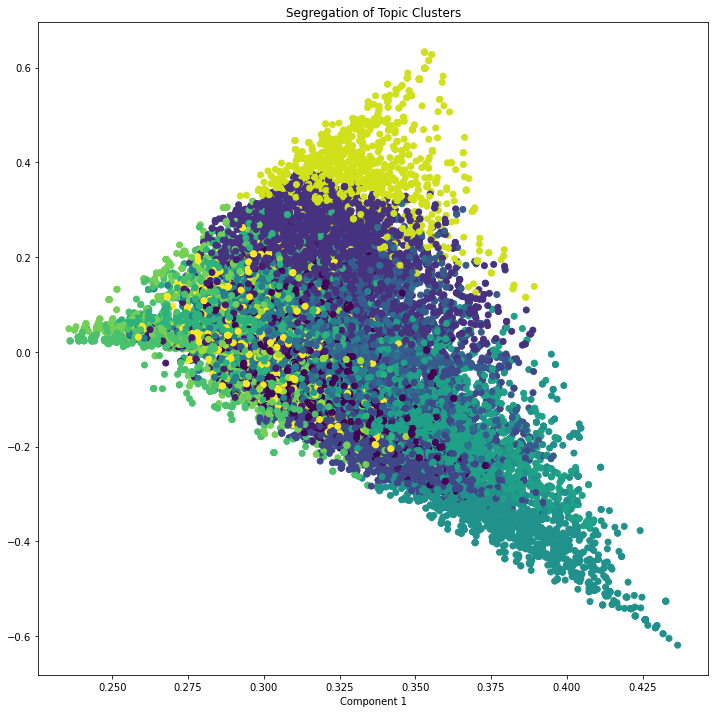

In [ ]:

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )


**Get similar documents for any given piece of text?**

Once you know the probaility of topics for a given document (using predict_topic()), compute the euclidean distance with the probability scores of all other documents.

The most similar documents are the ones with the smallest distance.

In [ ]:

from sklearn.metrics.pairwise import euclidean_distances
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

In [ ]:

mytext = ['I think they are really helpful']
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
# print('\n', docs[0][:500])
# print()


ValueError: ignored